In [1]:
nyc_taxi = pd.read_csv('../data/train.csv')

In [2]:
nyc_taxi.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [3]:
nyc_taxi["vendor_id"].unique()

array([2, 1])

In [4]:
nyc_taxi.sort_values("passenger_count", ascending=False).head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
436047,id2489742,2,2016-06-24 08:09:21,2016-06-24 08:18:41,9,-73.710632,40.671581,-73.710632,40.671581,N,560
826064,id1488553,2,2016-01-01 01:15:20,2016-01-01 01:17:04,8,-73.992653,40.768719,-74.041374,40.729954,N,104
489613,id0506488,2,2016-05-08 22:39:08,2016-05-08 22:39:23,7,-74.039482,40.715031,-74.039482,40.715019,N,15
824904,id0988237,2,2016-04-23 19:46:08,2016-04-23 19:46:33,7,-73.631149,40.768551,-73.631149,40.768551,N,25
433304,id3280610,2,2016-06-07 10:06:24,2016-06-07 10:06:43,7,-74.173668,40.737274,-74.173660,40.737297,N,19


In [5]:
nyc_taxi.sort_values("passenger_count", ascending=False).tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
914211,id1656232,1,2016-04-21 06:04:56,2016-04-21 06:05:18,0,-73.978149,40.750183,-73.978104,40.750477,N,22
827485,id2029944,1,2016-03-11 09:38:54,2016-03-11 09:38:57,0,-73.790398,40.655457,-73.790398,40.655457,N,3
904688,id3563937,1,2016-02-13 16:52:38,2016-02-13 16:57:48,0,-73.962097,40.776146,-73.958160,40.767014,N,310
1211269,id0662963,2,2016-02-13 04:41:13,2016-02-13 04:41:22,0,-73.945633,40.803673,-73.945625,40.803661,N,9
1368627,id3368191,1,2016-05-08 23:38:09,2016-05-08 23:38:21,0,-73.934937,40.740841,-73.934929,40.740837,N,12


- 승객 수가 0명인 케이스 60건 존재 --> ?
- vendor 2가 더 많은 승객을 태움
- vendor 2가 더 많은 시간을 운행함
- vendor 1 vs vendor 2
    - 위도 경도
    - 승/하차 시간
    

In [6]:
nyc_taxi["passenger_count"].describe()

count    1.458644e+06
mean     1.664530e+00
std      1.314242e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

In [7]:
nyc_taxi["passenger_count"].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [8]:
nyc_taxi.groupby(by="vendor_id").agg("mean")

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
vendor_id,,,,,,
1,1.259402,-73.974081,40.750859,-73.973532,40.751626,845.438244
2,2.016720,-73.972969,40.750974,-73.973315,40.751950,1058.643164


In [9]:
from ipyleaflet import *
import time

In [10]:
center = [40.766321, -73.965457]
zoom = 13
m = Map(center=center, zoom=zoom)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[40.671581, -73.710632], default_tiles=TileLayer(max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']), layers=(TileLayer(max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']),), layout=Layout(align_self='stretch', height='400px'), options=['attribution_control', 'basemap', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'], zoom=13)

In [11]:
import folium

In [12]:
import json
geo_path = '../data/geojson/state.geo.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [ ]:
# map = folium.Map(location=[40.671581, -73.710632], zoom_start=11, tiles='Stamen Toner')

# map.choropleth(geo_str = geo_str,
#                data = crime_anal_norm['살인'],
#                columns = [crime_anal_norm.index, crime_anal_norm['살인']],
#                fill_color = 'PuRd', #PuRd, YlGnBu
#                key_on = 'feature.id')
# map

In [13]:
map = folium.Map(location=[40.766321, -73.965457], zoom_start=10.5)

for idx, row in nyc_taxi[:150].iterrows():
    if pd.notnull(row["pickup_latitude"]):
        folium.Marker([row['pickup_latitude'], row['pickup_longitude']]).add_to(map)
        
map

In [14]:
pickup_lat = tuple(nyc_taxi["pickup_latitude"])
pickup_lng = tuple(nyc_taxi["pickup_longitude"])
dropoff_lat = tuple(nyc_taxi["dropoff_latitude"])
dropoff_lng = tuple(nyc_taxi["dropoff_longitude"])

In [15]:
pickup_loc = tuple(zip(pickup_lat, pickup_lng))
dropoff_loc = tuple(zip(dropoff_lat, dropoff_lng))

In [16]:
print(len(pickup_loc))
print(len(dropoff_loc))

1458644
1458644


In [17]:
import geopy.distance

In [18]:
from tqdm import tqdm_notebook

distance = []
for i in tqdm_notebook(range(len(pickup_loc))):
    distance.append(geopy.distance.vincenty(pickup_loc[i], dropoff_loc[i]).km)

HBox(children=(IntProgress(value=0, max=1458644), HTML(value='')))

In [19]:
df2 = pd.DataFrame({"distance": distance})
df2.tail()

,distance
1458639,1.227090
1458640,6.046212
1458641,7.821532
1458642,1.092524
1458643,1.133655


In [20]:
df = nyc_taxi[["trip_duration", "passenger_count"]]
df = pd.concat([df, df2], axis=1)
df.tail()

,trip_duration,passenger_count,distance
1458639,778,4,1.227090
1458640,655,1,6.046212
1458641,764,1,7.821532
1458642,373,1,1.092524
1458643,198,1,1.133655


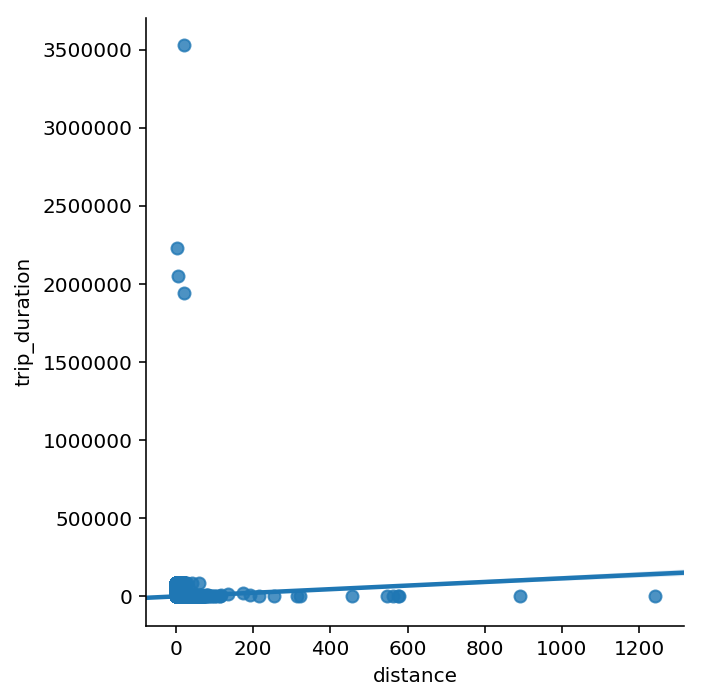

In [21]:
sns.lmplot(x="distance", y="trip_duration", data=df);

In [ ]:
sns.boxplot()

In [22]:
df.sort_values("trip_duration", ascending=False).head(20)

,trip_duration,passenger_count,distance
978383,3526282,1,19.926608
924150,2227612,1,1.633027
680594,2049578,2,5.992874
355003,1939736,1,20.160235
1234291,86392,2,20.666941
295382,86391,1,21.147722
73816,86390,1,2.005244
59891,86387,1,6.199703
1360439,86385,1,17.335134
753765,86379,4,9.818092


In [23]:
df["trip_duration"] = df[df["trip_duration"] < 1000000]
df.sort_values("trip_duration", ascending=False).head()

,trip_duration,passenger_count,distance
1234291,86392.0,2,20.666941
295382,86391.0,1,21.147722
73816,86390.0,1,2.005244
59891,86387.0,1,6.199703
1360439,86385.0,1,17.335134


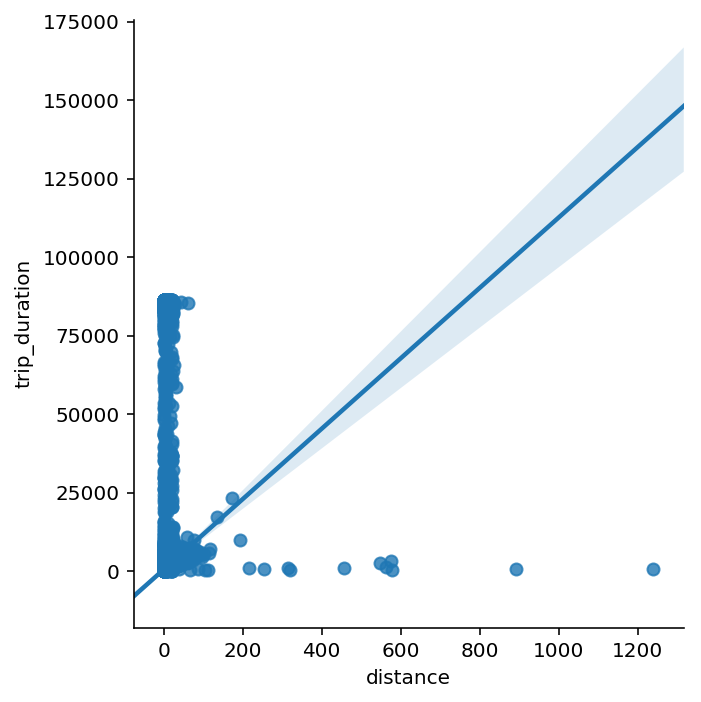

In [24]:
sns.lmplot(x="distance", y="trip_duration", data=df);

In [37]:
df2 = pd.DataFrame(df["trip_duration"].value_counts())
df2.reset_index(inplace=True)
df2.rename(columns={"index": "trip_duration", "trip_duration": "count"}, inplace=True)
df2.head()

,trip_duration,count
0,368.0,1624
1,408.0,1584
2,348.0,1582
3,367.0,1581
4,358.0,1577


In [53]:
df3 = df2.iloc[:, :10]

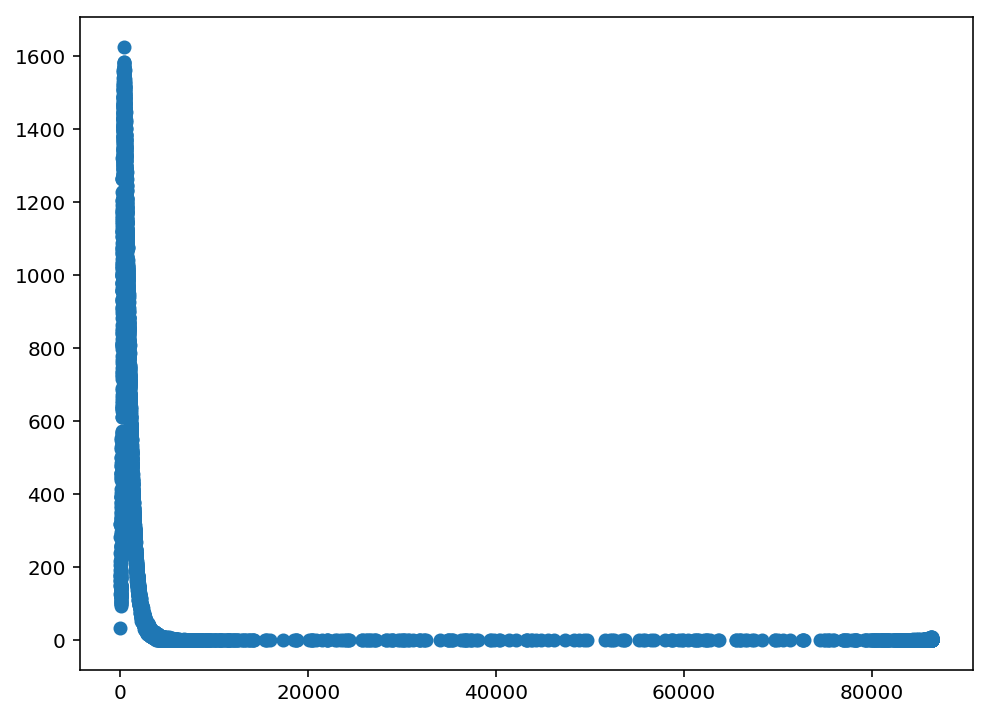

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter("trip_duration", "count", data=df2);

KeyboardInterrupt: 

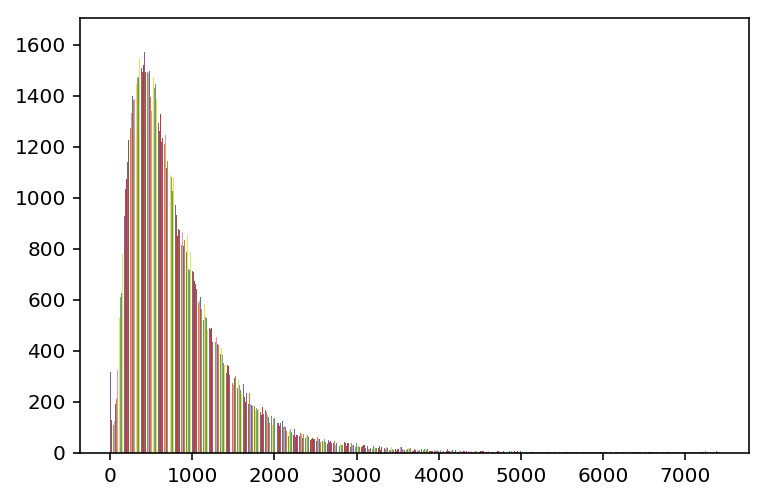

In [54]:
sns.barplot(x="trip_duration", y="count", data=df3, palette="Set1");

In [25]:
df.describe()

,trip_duration,passenger_count,distance
count,1.458640e+06,1.458644e+06,1.458644e+06
mean,9.528153e+02,1.664530e+00,3.442193e+00
std,3.171322e+03,1.314242e+00,4.300259e+00
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.970000e+02,1.000000e+00,1.232265e+00
50%,6.620000e+02,1.000000e+00,2.094045e+00
75%,1.075000e+03,2.000000e+00,3.874716e+00
max,8.639200e+04,9.000000e+00,1.240510e+03


In [ ]:
# import geopy.distance

# coords_1 = (52.2296756, 21.0122287)
# coords_2 = (52.406374, 16.9251681)

# print geopy.distance.vincenty(coords_1, coords_2).km